In [158]:
import importlib 

import ball
from ball import Ball
importlib.reload(ball)


from scipy.stats import boltzmann

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from IPython.display import HTML

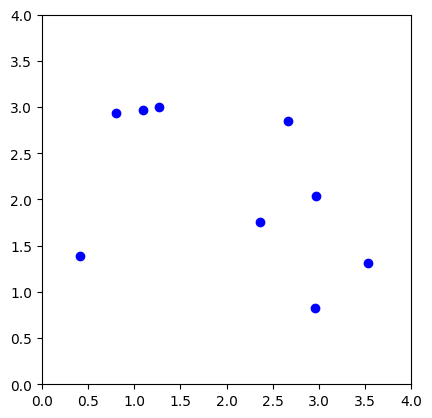

In [171]:
num_frames = 250
n = 3
balls = []
velocity_multiplier = 0.2

# set up the figure and axis
# plt.ioff() # stop automatic inline display
fig, ax = plt.subplots()
ax.set_xlim(0, n + 1)
ax.set_ylim(0, n + 1)
ax.set_aspect('equal')

# obtain positions for nxn grid
for i in range(n):
    for j in range(n):
        # create a dot at an initial dummy position
        circle, = ax.plot([], [], 'bo')
        ball = Ball([abs(i + 1), abs(j + 1)], circle)
        balls.append(ball)

# animation update function
def update(frame):
    for ball in balls:
        circle, position, velocity_x, velocity_y, direction_x, direction_y = ball.circle, ball.position, ball.velocity_x, ball.velocity_y, ball.direction_x, ball.direction_y

        Xpos = position[0]
        Ypos = position[1]

        if Xpos >= (n + 1):
            direction_x = -1
        elif Xpos <= 0:
            direction_x = 1

        if Ypos >= (n + 1):
            direction_y = -1
        elif Ypos <= 0:
            direction_y = 1

        # finalize positions for that frame
        Xpos = [(position[0] + (velocity_x * velocity_multiplier) * direction_x)]
        Ypos = [(position[1] + (velocity_y * velocity_multiplier) * direction_y)]

        # print("XPOS:", Xpos, "\nDIRECTION:", direction_x)

        circle.set_data(Xpos, Ypos)

        # update inherent ball position
        ball.position = [Xpos[0], Ypos[0]]
        ball.direction_x = direction_x
        ball.direction_y = direction_y

# HITS RIGHT / LEFT WALL
# x velocity flips

# HITS TOP / BOTTOM WALL
# y velocity flips

# walls are at 0 and n + 1
# if n is 1, then check if ball x position is >= 3
# if n is 1, then check if ball x position is <= 0
# if n is 1, then check if ball y position is >= 3
# if n is 1, then check if ball y position is <= 0
# ok cool

# frame generator
def frames(frames):
    for x in range(frames):
        yield x * 0.0015 # 0.015

# animation
ani_obj = animation.FuncAnimation(fig, update, frames=frames(num_frames), interval=1, save_count=num_frames) # interval=20
HTML(ani_obj.to_jshtml()) # render inline

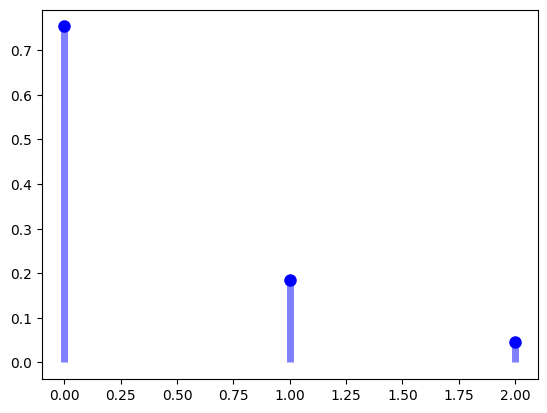

In [ ]:
# fig, ax = plt.subplots(1, 1)
# lambda_, N = 1.4, 19
# lb, ub = boltzmann.support(lambda_, N)
# mean, var, skew, kurt = boltzmann.stats(lambda_, N, moments="mvsk")

# x = np.arange(boltzmann.ppf(0.01, lambda_, N),
#               boltzmann.ppf(0.99, lambda_, N))
# ax.plot(x, boltzmann.pmf(x, lambda_, N), "bo", ms=8, label="boltzmann pmf")
# ax.vlines(x, 0, boltzmann.pmf(x, lambda_, N), colors="b", lw=5, alpha=0.5)

# prob = boltzmann.cdf(x, lambda_, N)
# np.allclose(x, boltzmann.ppf(prob, lambda_, N))

# r = boltzmann.rvs(lambda_, N, size=1000)